In [1]:
## This Jupyter notebook contains the explained code and output generated for week 1 assignment of the
## BrainHack School 2020. By Jonathan Gallego Rudolf.

## We will create a random variable that we will try to relate with our sample data. In order to do so we will 
## take advantage of several Python tools we learned to use during the BHS. We will first load our dataset 
## (brainsize.csv). Then we will find out how easily we can get evidence to support a fake hypothesis by generating
## a fake variable to relate with our "real" data. We will use a very simple and straightforward statistical
## analysis, the Pearson correlation to test the association between our variables. 



## "The use of high heeled footwear is associated with increased brain size and lower 
##  schizophrenia-related symptoms"

## By (future) Dr. Gallego-Rudolf, J.E.
## Published in: The Journal of best papers ever

## Abstract

## Introduction
## On 2004 Jarl Flensmark published a seminal paper suggesting that the use of heeled footwear may be
## associated with increased risk for some psychiatric disorders, including schizophrenia
## (please refer to the original publication: https://pubmed.ncbi.nlm.nih.gov/15325026/) XD
## Although the paper showed strong evidence supporting Flensmark hypothesis that the introduction of the use of
## heeled footwear was related to an increased prevalence of schizophrenia in European societies, it was
## later revealed it was a "scientific prank" and many have used this example to argue how causality can be easily
## confused with coincidence. However, one negative consequence was the fact that no one has taken this matter 
## seriously and, to date, it is still unknown if a relationship between these variables exists indeed. As it is 
## undeniable that both the use of heeled footwear and the prevalence of psychiatric disorders have significantly 
## augmented on modern societies, here I intend to shed light into this matter, once and for all.

## Method
## I collected data from 40 healthy adult subjects, both male and female. Each participant underwent an MRI scan
## from which I calculated their Brain size (number of voxels counted on MRI after brain extraction). Participants
## were also asked the average height of the heels of the shoes they usually wear, and were administered a brief
## schizophrenia inventory. All variables were trasformed to z scores and then I computed a Pearson
## correlation to estimate if there was an association between the use of high heeled footwear and brain size and 
## SCZ-related symptoms.

## Results
## Contrary to Flensmark original hypothesis, I found that higher height of heels in footwear was actually 
## related to lower prevalence of SCZ-related symptoms (r=0.54; p < 0.001). Moreover, higher height of heels
## in footwear was also related to increased brain size (r = 0.31; p < 0.05).

## Conclusion
## Here I clearly showed that the use of high heels appears to be a protective factor agains SCZ-related symptoms.
## The use of higher heeled shoes was also related to higher brain size. As smaller brain size has been 
## consistently reported in SCZ patients (which is actually truly reported in literature but was not found here 
## and therefore was "conveniently" not mentioned XD), the evidence found in this study suggest that the 
## protective effect of using high heeled shoes may at least be partially mediated by preventing the 
## neurodegenerative processes that result in reduction of brain size during schizophrenia (Dramatical and 
## excessively adventured conclusion based on a correlation XD). Future research should invest thousand of dollars 
## to go deeper into this matter, and assess the influence of other potentially relevant variables, 
## like the use of socks or the impact of wearing dressing shoes against flip-flops (which will probably be
## the upcoming projects developed in my lab XD).

In [2]:
# Alright, so first we are going to import all the libraries and tools we will be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import HTML
from numpy.random import seed
from numpy.random import randint

In [3]:
# Now lets load our dataset as a pandas dataframe and take a look a the header (select the right path 
# for your computer)
brain_size = pd.read_csv('/media/jonathan/Data/McGill/BHS/assigm1/Gallego-J-QLSC612/practical/brainsize.csv', delimiter=';')
brain_size.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,.,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545


In [4]:
# Lets replace the missing values '.' values with NaN
brain_size = brain_size.replace('.', np.nan)
brain_size.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545


In [5]:
# Now we will generate our random integer values that correspond to the height of the heel of shoes (in cm) 
# and we will store them in the variable PartY
# We will use a pseudorandom number generator tool for this
# First que select the seed for random number generator, let's do number 1
seed(1)
# Now generate the data using the randint function, and constrain the random number generator to plausible,
# realistic values for our measure, let's say between 0 and 12 cm of height. 
values = randint(0, 12, 40)

# Now put these values into the PartY variable and add it to our dataframe
brain_size['PartY'] = values
# Let's check our updated dataframe
brain_size.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,PartY
0,1,Female,133,132,124,118,64.5,816932,5
1,2,Male,140,150,124,NaN,72.5,1001121,11
2,3,Male,139,123,150,143,73.3,1038437,8
3,4,Male,133,129,128,172,68.8,965353,9
4,5,Female,137,132,134,147,65.0,951545,11


In [6]:
# Now we will generate our random integer values that correspond to the score of the SCZ-related symptoms
# inventory and we will store them in the variable SCZ.
# We will use a pseudorandom number generator tool for this.
# First que select the seed for random number generator, let's do number 11
seed(11)
# Now generate the data using the randint function, and constrain the random number generator to plausible,
# realistic values for our measure, (our inventory scores can range between 0 and 30, with lower values meaning
# higher prevalence of SCZ-related symptoms). 
values = randint(0, 30, 40)
# Now put these values into the SCZ variable and add it to our dataframe
brain_size['SCZ'] = values
# Let's check our updated dataframe
brain_size.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,PartY,SCZ
0,1,Female,133,132,124,118,64.5,816932,5,25
1,2,Male,140,150,124,NaN,72.5,1001121,11,16
2,3,Male,139,123,150,143,73.3,1038437,8,27
3,4,Male,133,129,128,172,68.8,965353,9,17
4,5,Female,137,132,134,147,65.0,951545,11,23


In [7]:
# Given that the absolute values of our variables of interest (brain size, height of heels, SCZ scores) are 
## very different it would be convenient to apply some transformation to our data to standardize those values.
# We will transform our data to z scores, nothing out of this world ...
# Then we add our newly created variables to our dataframe

MRI_Count_z = stats.zscore(brain_size['MRI_Count'])
brain_size['MRI_Count_z'] = MRI_Count_z
PartY_z = stats.zscore(brain_size['PartY'])
brain_size['PartY_z'] = PartY_z
SCZ_z = stats.zscore(brain_size['SCZ'])
brain_size['SCZ_z'] = SCZ_z
# Let's check our updated dataframe
brain_size.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,PartY,SCZ,MRI_Count_z,PartY_z,SCZ_z
0,1,Female,133,132,124,118,64.5,816932,5,25,-1.286526,-0.171850,1.117521
1,2,Male,140,150,124,NaN,72.5,1001121,11,16,1.294134,1.546650,0.114260
2,3,Male,139,123,150,143,73.3,1038437,8,27,1.816967,0.687400,1.340467
3,4,Male,133,129,128,172,68.8,965353,9,17,0.792991,0.973816,0.225734
4,5,Female,137,132,134,147,65.0,951545,11,23,0.599528,1.546650,0.894574


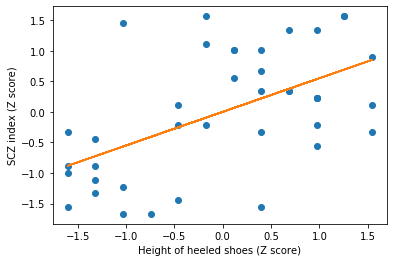

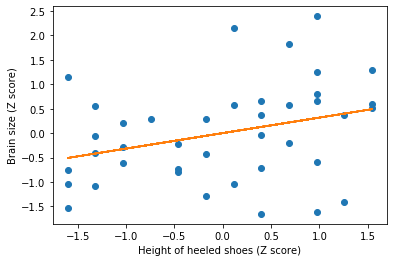

In [8]:
# Now lets make a couple of scatter plots and fit a linear model to them to visualize our data
fig1 = plt.figure()
plt.plot(brain_size['PartY_z'], brain_size['SCZ_z'], 'o')
plt.xlabel('Height of heeled shoes (Z score)')
plt.ylabel('SCZ index (Z score)')
m, b = np.polyfit(brain_size['PartY_z'], brain_size['SCZ_z'], 1)
plt.plot(brain_size['PartY_z'], m*brain_size['PartY_z'] + b)

fig2 = plt.figure()
plt.plot(brain_size['PartY_z'], brain_size['MRI_Count_z'], 'o')
plt.xlabel('Height of heeled shoes (Z score)')
plt.ylabel('Brain size (Z score)')
m, b = np.polyfit(brain_size['PartY_z'], brain_size['MRI_Count_z'], 1)
plt.plot(brain_size['PartY_z'], m*brain_size['PartY_z'] + b)

In [9]:
# Looks that in fact our variables appear to be related, now we can compute the correlation between the 
# height of the heels of shoes and the prevalence of  SCZ-related symptoms
corr_partY_MRI_zsc = stats.pearsonr(brain_size['PartY_z'], brain_size['MRI_Count_z'])
print('Correlation between Brain size and Height of heels in shoes')
print('Perason R coefficient:',corr_partY_MRI_zsc[0], ' p value:',corr_partY_MRI_zsc[1])
print('********')
# And between the height of the heels of shoes and brain size
corr_partY_SCZ_zsc = stats.pearsonr(brain_size['PartY_z'], brain_size['SCZ'])
print('Correlation between SCZ score and Height of heels in shoes')
print('Perason R coefficient:',corr_partY_SCZ_zsc[0], ' p value:',corr_partY_SCZ_zsc[1])

Correlation between Brain size and Height of heels in shoes
Perason R coefficient: 0.3172187727346044  p value: 0.046098089846026674
********
Correlation between SCZ score and Height of heels in shoes
Perason R coefficient: 0.5496375157310032  p value: 0.00023924674584819777


In [10]:
HTML('<img src="https://media.giphy.com/media/l3q2XhfQ8oCkm1Ts4/giphy.gif">')

In [11]:
# Everything looks very good and it seems that we have found clear evidence showing a protective effect of the
# use of high heeled shoes and SCZ-related symptoms. We also found that higher height of the heeled shoes seems 
# to be related with larger brain size. However, what would happen if we make a single small change ... like
# changing the seed from our random number generator:

seed(2)
# Now generate the data using the randint function again
values = randint(0, 12, 40)

# And put these values into the PartY2 variable and add it to our dataframe
brain_size['PartY2'] = values

PartY2_z = stats.zscore(brain_size['PartY2'])
brain_size['PartY2_z'] = PartY2_z



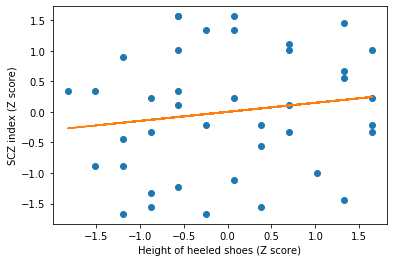

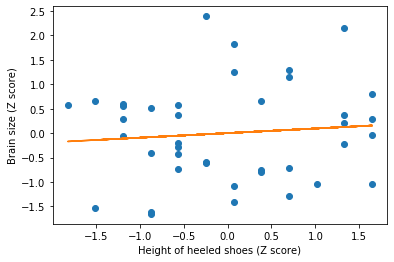

In [12]:
# Plot the data ...
fig1 = plt.figure()
plt.plot(brain_size['PartY2_z'], brain_size['SCZ_z'], 'o')
plt.xlabel('Height of heeled shoes (Z score)')
plt.ylabel('SCZ index (Z score)')
m, b = np.polyfit(brain_size['PartY2_z'], brain_size['SCZ_z'], 1)
plt.plot(brain_size['PartY2_z'], m*brain_size['PartY2_z'] + b)

fig2 = plt.figure()
plt.plot(brain_size['PartY2_z'], brain_size['MRI_Count_z'], 'o')
plt.xlabel('Height of heeled shoes (Z score)')
plt.ylabel('Brain size (Z score)')
m, b = np.polyfit(brain_size['PartY2_z'], brain_size['MRI_Count_z'], 1)
plt.plot(brain_size['PartY2_z'], m*brain_size['PartY2_z'] + b)

In [13]:
# And the correlations :(
corr_partY2_MRI_zsc = stats.pearsonr(brain_size['PartY2_z'], brain_size['MRI_Count_z'])
print('Correlation between Brain size and Height of heels in shoes')
print('Perason R coefficient:',corr_partY2_MRI_zsc[0], ' p value:',corr_partY2_MRI_zsc[1])
print('********')

corr_partY2_SCZ_zsc = stats.pearsonr(brain_size['PartY2_z'], brain_size['SCZ'])
print('Correlation between SCZ score and Height of heels in shoes')
print('Perason R coefficient:',corr_partY2_SCZ_zsc[0], ' p value:',corr_partY2_SCZ_zsc[1])

Correlation between Brain size and Height of heels in shoes
Perason R coefficient: 0.0941755370796647  p value: 0.563251662210842
********
Correlation between SCZ score and Height of heels in shoes
Perason R coefficient: 0.14818705351205572  p value: 0.36147904660488833


In [14]:
HTML('<img src="https://media.giphy.com/media/2wSaulb0fsDydh0IoB/giphy.gif">')

In [15]:
## Final remarks
## How could this happen? If we had a p value of 0.0002 for the correlation with SCZ ?? Well, of course this is 
## because we changed the random numbers we used, but what this example shows us?

## This time I did not even have to turn to some useful "semi-legal"  tricks commonly used 
## for in p-hacking, like removing some "outliers" with suspiciously convenient criteria, or adding a lot of 
## extra variables and conduct an excessive number of statistical tests until finding something interesting
## in the data. Just by generating the random variables (literally for height of heels I used the first seed I 
## tried -seed 1- and for the SCZ scores I used the second I tried -tried 1 then 11-). I was lucky I got the 
## desired fake result so easily, and that is a good reminder of what the "indisputable and sacred" p value really 
## reflect and the dangers of drawing all our conclusions from our data based on testing hypothesis as we 
## typically do: p value is not directly proportional to absoluteness of truth, an even a with a low p value
## we can be ignoring many other things or just being victims of chance. This was artificial (and very convenient
## for my assignment XD) but this could have actually been real data, collected faithfully and adequately, and 
## by looking at the first graphs and the beautiful p value we got we could have easily buy that (even if the 
## idea behind the results does not make much sense).

## My idea at first was finding evidence supporting the original hypothesis of Flensmark, however I got such nice
## results so easily that it was too good to let go, and I ended up modifying not only my original hypothesis but
## basically the whole perspective in which I adressed the issue. Here we aimed to be a "bad scientist" on purpose
## but after thinking about it, the reality is that many researchers do this all the time!! It it very common that
## researchers first go to their results and then build the story around them, by fitting all the pices they 
## conviniently select from the literature. If we put it like this, it surely does not sound right, but is it 
## wrong then? By doing this are we biasing the interpretations we make from the world? Should we then radically 
## change the way we do research and throw away everything we have done so far? That does not sound plausible 
## either, but maybe we could start by adopting some small changes in the way we do science, for the sake 
## of reproducibility. We learned many useful resouces that we can now use to share our data, to make our 
## pipelines consistent, to make our results reproducible, and to adequately desing and conduct experiments. 
## I believe this has been a big first step in my way to adhering to these normatives, but I know its a long road.
## At least now I will try to make use of this tools in real life, as well as trying to spread the word to make 
## science more reproducible.
